[Click Here to read on Kaggle](https://www.kaggle.com/code/sagarchhabriya/05-dl-early-stopping)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from mlxtend.plotting import plot_decision_regions


import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping



from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=42)

<Axes: >

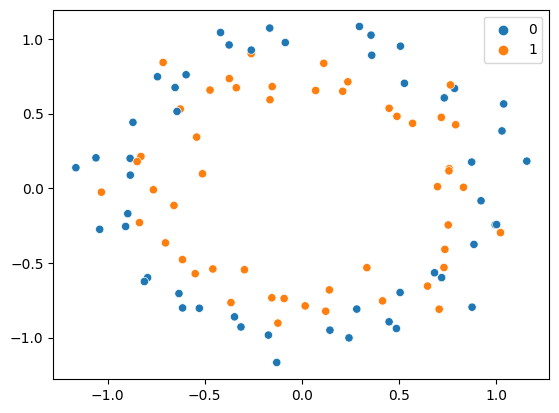

In [5]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
# Step 2: Define Layers

model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Step 3: Model compilation
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


# Step 4: Training the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=3000, verbose=0)


In [16]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

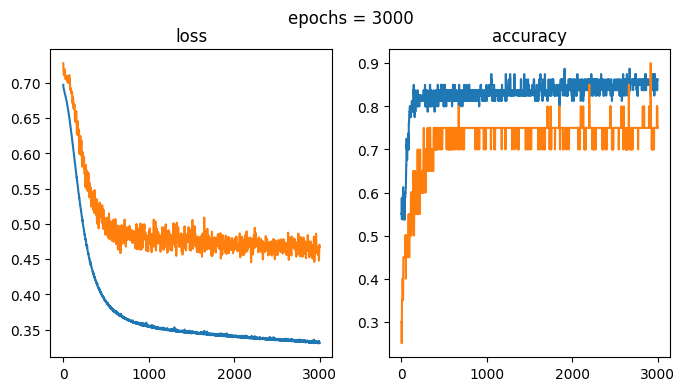

In [17]:
fig, axes = plt.subplots(1,2,figsize=(8,4))

fig.suptitle('epochs = 3000')

axes[0].set(title='loss')
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])

axes[1].set(title='accuracy')
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


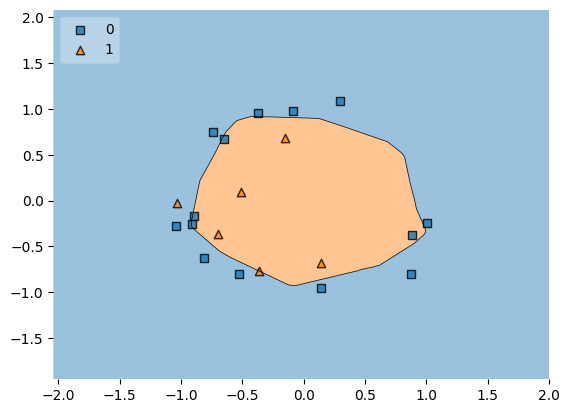

In [18]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [21]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

- **monitor**: Quantity to be monitored. Defaults to "val_loss".
- **min_delta**: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. Defaults to 0.
- **patience**: Number of epochs with no improvement after which training will be stopped. Defaults to 0.
- **verbose**: Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action. Defaults to 0.
- **mode**: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity. Defaults to "auto".
- **baseline**: Baseline value for the monitored quantity. If not None, training will stop if the model doesn't show improvement over the baseline. Defaults to None.
- **restore_best_weights**: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set. Defaults to False.
- **start_from_epoch**: Number of epochs to wait before starting to monitor improvement. This allows for a warm-up period in which no improvement is expected and thus training will not be stopped. Defaults to 0.

In [22]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [23]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5555 - loss: 0.6938 - val_accuracy: 0.3000 - val_loss: 0.7078
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5664 - loss: 0.6923 - val_accuracy: 0.2500 - val_loss: 0.7069
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5711 - loss: 0.6936 - val_accuracy: 0.3000 - val_loss: 0.7079
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6102 - loss: 0.6899 - val_accuracy: 0.3000 - val_loss: 0.7095
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5719 - loss: 0.6887 - val_accuracy: 0.3000 - val_loss: 0.7105
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5172 - loss: 0.6937 - val_accuracy: 0.3000 - val_loss: 0.7100
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5406 - loss: 0.6901 - val_accuracy: 0.3500 - val_loss: 0.7114
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5789 - loss: 0.6895 - val_accuracy: 0.3000 - v

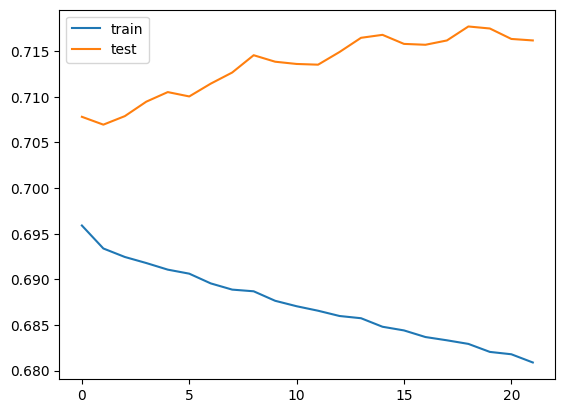

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


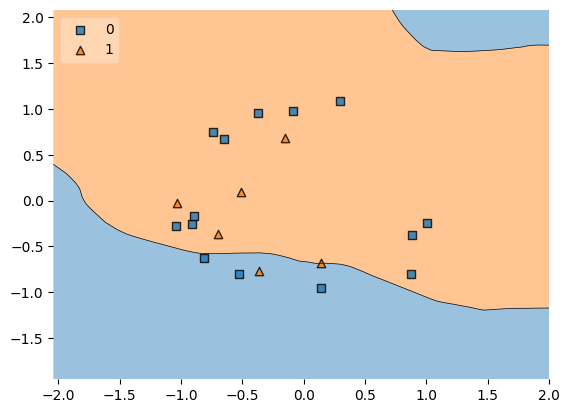

In [25]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()